In [1]:
import boto3
import os
from dotenv import load_dotenv
from pdf2image import convert_from_path
import pandas as pd
from PIL import Image

import matplotlib.pyplot as plt


In [2]:
pdf_path = '../data/input/allweiler_page_1.pdf'

images = convert_from_path(pdf_path)
image = images[0]

# # load png image
# image_path = 'output_image.png'
# image = Image.open(image_path)

<function matplotlib.pyplot.show(close=None, block=None)>

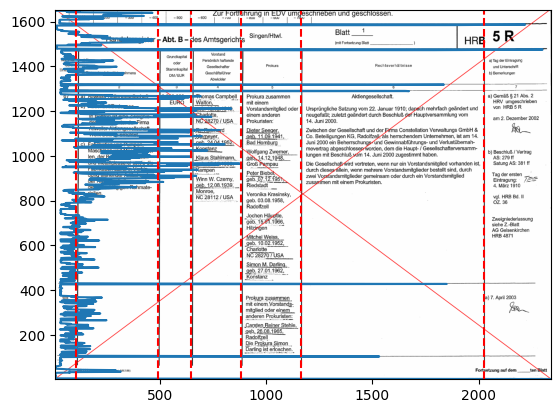

In [7]:
import numpy as np

# Assuming 'image' is your PIL image object
threshold = 128  # Define your threshold for dark pixels

# Convert the image to a NumPy array
image_array = np.array(image)

# Convert the image to grayscale
gray_image = np.array(image.convert("L"))

# Create a binary mask of dark pixels
dark_pixels = gray_image < threshold

# Sum the dark pixels along each row to get the counts
dark_pixel_counts = np.sum(dark_pixels, axis=1)

# 'dark_pixel_counts' now contains the number of dark pixels for each row

row_list = dark_pixel_counts.tolist()

row_list = row_list[::-1]

row_numbers = list(range(1, len(row_list) + 1))

# Create a blank figure and axis
fig, ax = plt.subplots()

# Plot the image as a background using imshow
ax.imshow(image, aspect='auto', extent=[min(row_list), max(row_list), 1, len(row_list)])

# Create the plot on top of the image
plt.plot(row_list, row_numbers)

# Define the x pixel coordinates for the vertical lines
vertical_lines = [107, 493, 649, 883, 1163, 2023]

# Plot vertical lines at the specified x pixel coordinates
for x in vertical_lines:
    ax.axvline(x, color='red', linestyle='--')

# plot the values of row_list where the y-axis is the row number and the x-axis is the number of dark pixels
plt.show